In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
mu_0 = 4 * np.pi * 10**(-7)

In [12]:
N0_k = 25
Ni_k = 250
S_k = 2 * 10**(-4)
topr_k = 0.11

N0_p = 20
Ni_p = 300
S_p = 0.76 * 10**(-4)
topr_p = 0.133

N0_f = 45
Ni_f = 400
S_f = 3 * 10**(-4)
topr_f = 0.25


[4005.611607736819, 4108.31959767879, 3943.986813771638, 3697.48763791091, 3286.6556781430318, 2191.1037854286856, 3873.558477811435, 3873.5584778114353, 3943.9868137716403]
154140247.05439258


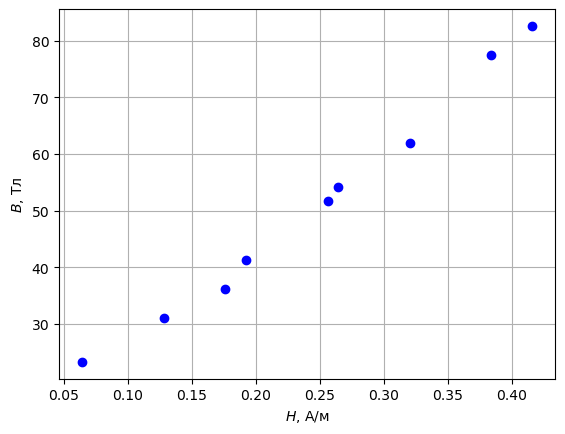

In [15]:
H_k = [
82.6446280991736,
61.9834710743802,
51.6528925619835,
41.3223140495868,
30.9917355371901,
23.2438016528926,
36.1570247933884,
54.2355371900826,
77.4793388429752
]

B_k = [
0.416,
0.32,
0.256,
0.192,
0.128,
0.064,
0.176,
0.264,
0.384

]
mu_k = [B_k[i] / (H_k[i] * mu_0) for i in  range(len(B_k))]
print(mu_k)
x = B_k
y = H_k
x1 = x[len(x)-2:]
y1 = y[len(x)-2:]
dx = []
dy = []

fig, ax = plt.subplots()
model1 = np.poly1d(np.polyfit(x1, y1, 1))


#plt.legend()
plt.scatter(x, y, marker='o', color='blue')
#plt.errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', linestyle='')

print(model1.c[0] / mu_0)
plt.grid()
plt.xlabel('$H$, А/м')
plt.ylabel('$B$, Тл')
#plt.show()
plt.savefig('tex/images/plot1v2.png', bbox_inches='tight')

In [167]:
0.28 * ((0.5 / 40)**2 + (0.5 / 9)**2)**0.5

0.015944444444444445

In [144]:
C = 20 * 10**(-6)
R = 20 * 10**(3)

N0_k = 20
Ni_k = 200
S_k = 2 * 10**(-4)
topr_k = 0.11

N0_p = 15
Ni_p = 300
S_p = 0.66 * 10**(-4)
topr_p = 0.141

N0_f = 45
Ni_f = 400
S_f = 3 * 10**(-4)
topr_f = 0.25

In [145]:
def Hcalculate(N0, topr, Kx, ix):
    return [N0 * Kx * i / topr for i in ix]
def Bcalculate(Ni, S, Ky, ui):
    return [R * C * i * Ky / (S * Ni) for i in ui]

Hc is  [63.636363636363626]
Bs is  [1.925]
Br is  [0.7]
10941.902337567803
dH is  9.09090909090909
dB is  0.05
dmu is  3895.318939711581
[7002.817496043396, 7878.169683048819, 8128.270307907513, 9151.409227783983, 10004.02499434771, 11379.578431070517, 11671.36249340566]


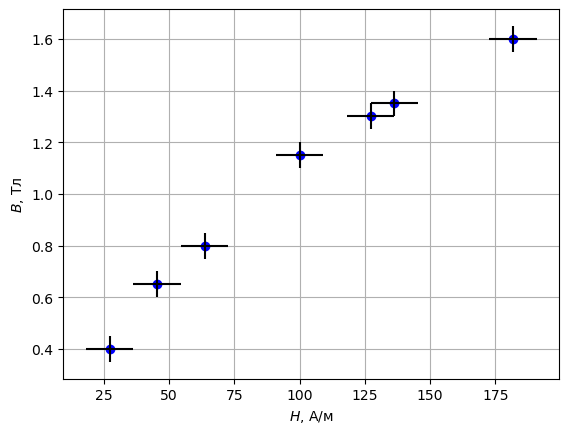

In [164]:
# Кремнистое железо

Y_k = [16, 13.5, 13, 11.5, 8, 6.5, 4]
X_k = [10, 7.5, 7, 5.5, 3.5, 2.5, 1.5]


Kx_k = 0.022 / 0.22
Ky_k = 0.01

x = Hcalculate(N0_k, topr_k, Kx_k, X_k)
y = Bcalculate(Ni_k, S_k, Ky_k, Y_k)

print("Hc is ", Hcalculate(N0_k, topr_k, Kx_k, [3.5]))
print("Bs is ", Bcalculate(Ni_k, S_k, Ky_k, [38.5/2]))
print("Br is ", Bcalculate(Ni_k, S_k, Ky_k ,[7]))

mus = (y[-2] - y[-1]) / ((x[-2] - x[-1]) * mu_0)
print((y[-2] - y[-1]) / ((x[-2] - x[-1]) * mu_0))

dx = Hcalculate(N0_k, topr_k, Kx_k, [0.5 for i in range(len(x))])
dy = Bcalculate(Ni_k, S_k, Ky_k, [0.5 for i in range(len(x))])
print("dH is ", dx[0])
print("dB is ", dy[0])
print("dmu is ", mus * ((dx[0] / min(x))**2 + (dy[0] / min(y))**2)**0.5)

mu_k = [y[i] / (x[i] * mu_0) for i in  range(len(x))]

print(mu_k)

fig, ax = plt.subplots()

#plt.legend()
plt.scatter(x, y, marker='o', color='blue')
plt.errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', linestyle='')

plt.grid()
plt.xlabel('$H$, А/м')
plt.ylabel('$B$, Тл')
#plt.show()
plt.savefig('tex/images/plot1.png', bbox_inches='tight')

83779.16204357371
Hc is  [48.35589941972921]
Bs is  [3.818181818181818]
Br is  [3.818181818181818]
dH is  6.0444874274661515
dB is  0.2121212121212121
dmu is  45116.45950082719
[15957.93562734737, 27926.387347857893, 37235.1831304772, 31915.87125469474, 23271.989456548243, 11170.554939143158]


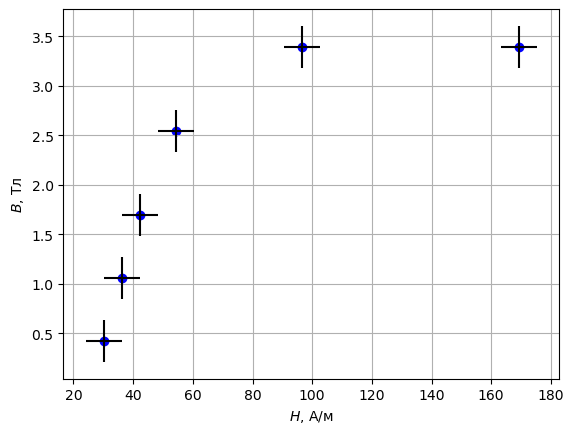

In [165]:
# Перамаллой

Y_p = [8, 8, 6, 4, 2.5, 1]
X_p = [14, 8, 4.5, 3.5, 3, 2.5]

#K_px = 0.005
#K_py = 2.1

Kx_p = 0.025 / 0.22
Ky_p = 0.021

x = Hcalculate(N0_p, topr_p, Kx_p, X_p)
y = Bcalculate(Ni_p, S_p, Ky_p, Y_p)
mus = (y[-2] - y[-1]) / ((x[-2] - x[-1]) * mu_0)
print(mus)
print("Hc is ", Hcalculate(N0_p, topr_p, Kx_p, [4]))
print("Bs is ", Bcalculate(Ni_p, S_p, Ky_p, [9]))
print("Br is ", Bcalculate(Ni_p, S_p, Ky_p, [9]))

dx = Hcalculate(N0_p, topr_p, Kx_p, [0.5 for i in range(len(x))])
dy = Bcalculate(Ni_p, S_p, Ky_p, [0.5 for i in range(len(x))])
print("dH is ", dx[0])
print("dB is ", dy[0])
print("dmu is ", mus * ((dx[0] / min(x))**2 + (dy[0] / min(y))**2)**0.5)
mu_k = [y[i] / (x[i] * mu_0) for i in  range(len(x))]

print(mu_k)

fig, ax = plt.subplots()

#plt.legend()
plt.scatter(x, y, marker='o', color='blue')
plt.errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', linestyle='')

plt.grid()
plt.xlabel('$H$, А/м')
plt.ylabel('$B$, Тл')
#plt.show()
plt.savefig('tex/images/plot2.png', bbox_inches='tight')

7801.171111043716
Hc is  [1.6363636363636362]
Bs is  [0.33833333333333326]
Br is  [0.1283333333333333]
dH is  1.6363636363636362
dB is  0.011666666666666665
dmu is  2028.3351054813875
[3545.9868686562327, 5318.980302984349, 10212.442181729952, 11819.956228854113, 19857.526464474904]
90428944.9385769


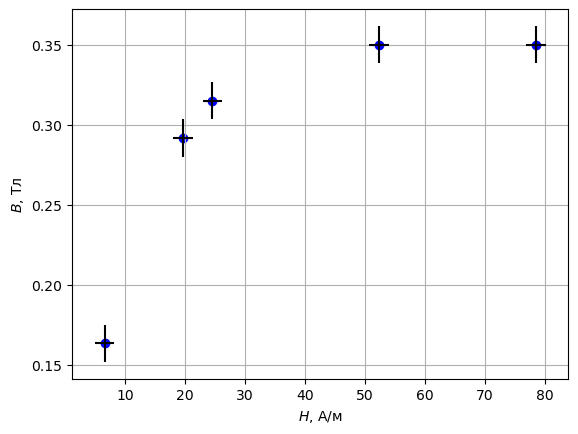

In [166]:
# Феррит

Y_f = [15, 15, 13.5, 12.5, 7]
X_f = [24, 16, 7.5, 6, 2]


#Kx_f = 0.004
#K_fy = 1.4

Kx_f = 0.004 / 0.22
Ky_f = 0.007

x = Hcalculate(N0_f, topr_f, Kx_f, X_f)
y = Bcalculate(Ni_f, S_f, Ky_f, Y_f)
mus = (y[-2] - y[-1]) / ((x[-2] - x[-1]) * mu_0)
print(mus)

dx = Hcalculate(N0_f, topr_f, Kx_f, [0.5 for i in range(len(x))])
dy = Bcalculate(Ni_f, S_f, Ky_f, [0.5 for i in range(len(x))])

print("Hc is ", Hcalculate(N0_f, topr_f, Kx_f, [0.5]))
print("Bs is ", Bcalculate(Ni_f, S_f, Ky_f, [29/2]))
print("Br is ", Bcalculate(Ni_f, S_f, Ky_f, [5.5]))
print("dH is ", dx[0])
print("dB is ", dy[0])
print("dmu is ", mus * ((dx[0] / min(x))**2 + (dy[0] / min(y))**2)**0.5)
mu_k = [y[i] / (x[i] * mu_0) for i in  range(len(x))]

print(mu_k)

fig, ax = plt.subplots()

#plt.legend()
plt.scatter(x, y, marker='o', color='blue')
plt.errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', linestyle='')

print(model1.c[0] / mu_0)
plt.grid()
plt.xlabel('$H$, А/м')
plt.ylabel('$B$, Тл')
#plt.show()
plt.savefig('tex/images/plot3.png', bbox_inches='tight')